# CCLAMP Diachronic Network

In [1]:
# Import packages
import pandas as pd
import numpy as np
from itertools import combinations

# Read data
mentions_and_authors.txt and metadata

In [2]:
# Read mentions
mentions = pd.read_csv("mentions_and_authors.txt", sep="\t", encoding='utf-8')
mentions.head(10)

,File,Mentions,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender
0,GEM_1925_3,Joep Nicolas,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male
1,GEM_1925_5,Hendrik Andriessen,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male
2,GEM_1925_6,Willem Nieuwenhuis,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male
3,GEM_1925_7,Karel van den Oever,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male
4,GEM_1925_9,Wies Moens,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male
5,GEM_1925_11,Henri Bruning,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
6,GEM_1925_11,Joep Nicolas,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
7,GEM_1925_11,Albert Kuyle,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
8,GEM_1925_11,Albe,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed
9,GEM_1925_12,Carel Scharten,1925,Kroniek,Jan Engelman; Willem Maas; Albert Kuyle; Jan B...,7 juni 1900; 28 april 1897; 17 februari 1904; ...,NaN,20 maart 1972; 6 mei 1950; 4 maart 1958; 11 ma...,NaN,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed


In [3]:
# Add new column with Era to the mentions
# Creating custom intervals
conditions = [
    (mentions['Year'] < 1900),
    (mentions['Year'] >= 1900) & (mentions['Year'] <= 1950),
    (mentions['Year'] > 1950)
]

choices = ['Pre-1900s', '1900s-1950s', 'Post-1950s']

mentions['Era'] = np.select(conditions, choices, default='Other')

mentions.head(10)

,File,Mentions,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender,Era
0,GEM_1925_3,Joep Nicolas,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male,1900s-1950s
1,GEM_1925_5,Hendrik Andriessen,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male,1900s-1950s
2,GEM_1925_6,Willem Nieuwenhuis,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male,1900s-1950s
3,GEM_1925_7,Karel van den Oever,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male,1900s-1950s
4,GEM_1925_9,Wies Moens,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male,1900s-1950s
5,GEM_1925_11,Henri Bruning,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
6,GEM_1925_11,Joep Nicolas,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
7,GEM_1925_11,Albert Kuyle,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
8,GEM_1925_11,Albe,1925,Jonge litteratuur,Henk Kuitenbrouwer; Jan Bruna,20 november 1903; 17 augustus 1876,NaN,3 augustus 1974; 11 maart 1931,NaN,https://www.dbnl.org/auteurs/auteur.php?id=kui...,mixed,1900s-1950s
9,GEM_1925_12,Carel Scharten,1925,Kroniek,Jan Engelman; Willem Maas; Albert Kuyle; Jan B...,7 juni 1900; 28 april 1897; 17 februari 1904; ...,NaN,20 maart 1972; 6 mei 1950; 4 maart 1958; 11 ma...,NaN,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed,1900s-1950s


In [4]:
# Read the metadata file
metadata = pd.read_csv("C-CLAMP_metadata_gender.txt", sep="\t", encoding='utf-8')
metadata.head(10)

,File,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender
0,GEM_1925_1,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GEM_1925_2,1925,Gedachten over architectuur.,Jan Engelman; Willem Maas,7 juni 1900; 28 april 1897,Utrecht; Utrecht,20 maart 1972; 6 mei 1950,Amsterdam; Utrecht,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed
2,GEM_1925_3,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male
3,GEM_1925_4,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GEM_1925_5,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male
5,GEM_1925_6,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male
6,GEM_1925_7,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male
7,GEM_1925_8,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GEM_1925_9,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male
9,GEM_1925_10,1925,De gemeenschap der volkeren.,Eduard A. Serrarens,27 december 1895,Maastricht,25 november 1955,Roermond,https://www.dbnl.org/auteurs/auteur.php?id=ser...,male


In [5]:
# Add Era to metadata
# Creating custom intervals
conditions = [
    (metadata['Year'] < 1900),
    (metadata['Year'] >= 1900) & (metadata['Year'] <= 1950),
    (metadata['Year'] > 1950)
]

choices = ['Pre-1900s', '1900s-1950s', 'Post-1950s']

metadata['Era'] = np.select(conditions, choices, default='Other')

metadata.head(10)

,File,Year,Title,Author,DOB,POB,DOD,POD,Link,Gender,Era
0,GEM_1925_1,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s-1950s
1,GEM_1925_2,1925,Gedachten over architectuur.,Jan Engelman; Willem Maas,7 juni 1900; 28 april 1897,Utrecht; Utrecht,20 maart 1972; 6 mei 1950,Amsterdam; Utrecht,https://www.dbnl.org/auteurs/auteur.php?id=eng...,mixed,1900s-1950s
2,GEM_1925_3,1925,Sint Maartensavond Bij een linoleumsnede van J...,Joep Nicolas,6 oktober 1897,NaN,25 juli 1972,Steyl,https://www.dbnl.org/auteurs/auteur.php?id=nic...,male,1900s-1950s
3,GEM_1925_4,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s-1950s
4,GEM_1925_5,1925,Is de nieuwe meerstemmige kerkmuziek in Nederl...,Albert Helman,7 november 1903,Paramaribo,10 juli 1996,Amsterdam,https://www.dbnl.org/auteurs/auteur.php?id=hel...,male,1900s-1950s
5,GEM_1925_6,1925,Dagelijksch brood en dagelijksch leven.,Willem Nieuwenhuis,1886,NaN,1935,NaN,https://www.dbnl.org/auteurs/auteur.php?id=nie...,male,1900s-1950s
6,GEM_1925_7,1925,In Memoriam Fratris,Karel van den Oever,19 november 1879,Antwerpen,6 oktober 1926,Antwerpen,https://www.dbnl.org/auteurs/auteur.php?id=oev...,male,1900s-1950s
7,GEM_1925_8,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900s-1950s
8,GEM_1925_9,1925,Koraal.,Wies Moens,28 januari 1898,Sint-Gillis-Bij-Dendermonde,5 februari 1982,Geleen,https://www.dbnl.org/auteurs/auteur.php?id=moe...,male,1900s-1950s
9,GEM_1925_10,1925,De gemeenschap der volkeren.,Eduard A. Serrarens,27 december 1895,Maastricht,25 november 1955,Roermond,https://www.dbnl.org/auteurs/auteur.php?id=ser...,male,1900s-1950s


# Create subsets per Era

In [6]:
Era_dataframes = {}

# Iterate through Era values and create subsets
for Era in mentions['Era'].unique():
    subset = mentions[mentions['Era'] == Era][['Mentions', 'Author']]  # Subset based on the Era and keep only Author and Mentions
    Era_dataframes[Era] = subset  # Store the subset DataFrame in the dictionary

# Print each subset DataFrame
for Era, dataframe in Era_dataframes.items():
    print(f"DataFrame for Era {Era}:")
    print(dataframe)
    print("\n")



DataFrame for Era 1900s-1950s:
                   Mentions                                             Author
0              Joep Nicolas                                       Joep Nicolas
1        Hendrik Andriessen                                      Albert Helman
2        Willem Nieuwenhuis                                 Willem Nieuwenhuis
3       Karel van den Oever                                Karel van den Oever
4                Wies Moens                                         Wies Moens
...                     ...                                                ...
138371             Henricus  Eugenius Druwé; Albert Deblaere; R. Leijs; Pau...
138372           M. Huybens  Eugenius Druwé; Albert Deblaere; R. Leijs; Pau...
138373             R. Leijs  Eugenius Druwé; Albert Deblaere; R. Leijs; Pau...
138374                 Léon  Eugenius Druwé; Albert Deblaere; R. Leijs; Pau...
138375             Horatius  Eugenius Druwé; Albert Deblaere; R. Leijs; Pau...

[50126 rows x 2 colu

In [7]:
Era_dataframes_metadata = {}

# Iterate through Era values and create subsets
for Era in metadata['Era'].unique():
    subset = metadata[metadata['Era'] == Era][['Author']]  # Subset based on the Era'and keep only Author
    dataframe_name = f"{Era}"  # Creating a dynamic name for the DataFrame
    Era_dataframes_metadata[dataframe_name] = subset  # Store the subset DataFrame in the dictionary

# Print each subset DataFrame
for Era, dataframe in Era_dataframes_metadata.items():
    print(f"DataFrame for Era {Era}_metadata:")
    print(dataframe)
    print("\n")



DataFrame for Era 1900s-1950s_metadata:
                                                  Author
0                                                    NaN
1                              Jan Engelman; Willem Maas
2                                           Joep Nicolas
3                                                    NaN
4                                          Albert Helman
...                                                  ...
52926                                      André Vlerick
52927                                      Arthur Thomas
52928                                        G. de Vocht
52929  Eugenius Druwé; Albert Deblaere; R. Leijs; Pau...
52930                                                NaN

[21778 rows x 1 columns]


DataFrame for Era Pre-1900s_metadata:
                          Author
2053                         NaN
2054                         NaN
2055                         NaN
2056                         NaN
2057                         NaN
...         

# Calculate the weights per Era

In [8]:
# Create coauthor x coauthor pairs

Era_coauthors_dataframes = {}

# Function to get combinations of authors
def get_author_combinations(row):
    authors = row['Author'].split('; ')
    return list(combinations(authors, 2))  # Change the number inside combinations() for different combinations

for Era, dataframe in Era_dataframes_metadata.items():
    # Create coauthors_df
    coauthors_df = dataframe[['Author']].copy()

    # Filter out rows with only 1 author
    df_filtered = coauthors_df[coauthors_df['Author'].str.count(';') > 0]
    
    # Apply the function to each row: this will create a new column 'Author Combinations' with a list of combinations for each row
    df_filtered['Author Combinations'] = df_filtered.apply(get_author_combinations, axis=1)

    # Assuming df_filtered is your DataFrame with author combinations

    # Create an empty list to store the combinations
    combinations_list = []

    # Iterate through each row and extract combinations
    for _, row in df_filtered.iterrows():
        combinations_list.extend(row['Author Combinations'])
    
    dataframe_name = f"{Era}"
    Era_coauthors_dataframes[dataframe_name] = pd.DataFrame(combinations_list, columns=['Author', 'Coauthor'])
    
for Era, dataframe in Era_coauthors_dataframes.items():
    print(f"DataFrame for Era {Era}:")
    print(dataframe)
    print("\n")

C:\Users\u0149275\AppData\Local\Temp\ipykernel_13744\2190741628.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Author Combinations'] = df_filtered.apply(get_author_combinations, axis=1)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_13744\2190741628.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Author Combinations'] = df_filtered.apply(get_author_combinations, axis=1)
C:\Users\u0149275\AppData\Local\Temp\ipykernel_13744\2190741628.py:18: SettingWithCopyWarning: 
A valu

DataFrame for Era 1900s-1950s:
                   Author            Coauthor
0            Jan Engelman         Willem Maas
1      Henk Kuitenbrouwer           Jan Bruna
2            Jan Engelman         Willem Maas
3            Jan Engelman        Albert Kuyle
4            Jan Engelman           Jan Bruna
...                   ...                 ...
16305            J. Hoing  Hendrik Imberechts
16306            J. Hoing            H. Aerts
16307       Flor Kielbaey  Hendrik Imberechts
16308       Flor Kielbaey            H. Aerts
16309  Hendrik Imberechts            H. Aerts

[16310 rows x 2 columns]


DataFrame for Era Pre-1900s:
                                         Author              Coauthor
0                    Henry Wadsworth Longfellow        E.J. Potgieter
1                               Petrus de Raadt  Jan Gerhardus Ottema
2                                     P.J. Veth    W.J.C. van Hasselt
3                                E.J. Potgieter    S.J. van den Bergh
4         

In [9]:
# create mention x author pairs

Era_mentions_authors_dataframes = {}

for Era, dataframe in Era_dataframes.items():
    # Splitting authors column
    authors_split = dataframe['Author'].str.split('; ', expand=True).stack()

    # Dropping the original authors column
    dataframe.drop('Author', axis=1, inplace=True)

    # Restoring the index alignment
    authors_split.index = authors_split.index.droplevel(1)

    # Combining the DataFrame with split authors and original DataFrame
    dataframe = dataframe.join(authors_split.rename('Author'))
    
    dataframe_name = f"{Era}"
    Era_mentions_authors_dataframes[dataframe_name] = pd.DataFrame(combinations_list, columns=['Author', 'Mentions'])

for Era, dataframe in Era_mentions_authors_dataframes.items():
    print(Era)
    print(f"DataFrame for Era {Era}:")
    print(dataframe)
    print("\n")

1900s-1950s
DataFrame for Era 1900s-1950s:
                          Author             Mentions
0      Ernst Denny Hirsch Ballin        W.J.W. Koster
1      Ernst Denny Hirsch Ballin      J.C.H. de Pater
2      Ernst Denny Hirsch Ballin  Jan Sebastian Rabie
3      Ernst Denny Hirsch Ballin       M.J. Langeveld
4                  W.J.W. Koster      J.C.H. de Pater
...                          ...                  ...
13269             Karel Porteman           Jan Herman
13270             Ignace Bossuyt      Piet Couttenier
13271             Ignace Bossuyt           Jan Herman
13272            Piet Couttenier           Jan Herman
13273           Raymond Vervliet    Joris Vlasselaers

[13274 rows x 2 columns]


Pre-1900s
DataFrame for Era Pre-1900s:
                          Author             Mentions
0      Ernst Denny Hirsch Ballin        W.J.W. Koster
1      Ernst Denny Hirsch Ballin      J.C.H. de Pater
2      Ernst Denny Hirsch Ballin  Jan Sebastian Rabie
3      Ernst Denny Hirsch 

In [13]:
# Combine DataFrames based on Era

# Initialize a dictionary to hold the transformed DataFrames
transformed_dataframes = {}

for Era, df_mentions_authors in Era_mentions_authors_dataframes.items():    
    if Era in Era_coauthors_dataframes:
        df_coauthors = Era_coauthors_dataframes[Era]
        
        # Transform mentions/authors DataFrame
        df_mentions_authors_transformed = df_mentions_authors.rename(columns={'Author': 'Source', 'Mentions': 'Target'})
        
        # Transform coauthors DataFrame
        df_coauthors_transformed1 = df_coauthors.rename(columns={'Author': 'Source', 'Coauthor': 'Target'})
        df_coauthors_transformed2 = df_coauthors.rename(columns={'Coauthor': 'Source', 'Author': 'Target'})
        
        # Combine the three DataFrames
        combined_df = pd.concat([
            df_mentions_authors_transformed,
            df_coauthors_transformed1,
            df_coauthors_transformed2
        ], ignore_index=True)
        
        # Store the combined DataFrame in the dictionary
        transformed_dataframes[Era] = combined_df
    else:
        print(f"No matching coauthor data for Era {Era}")

# Print transformed DataFrames
for Era, dataframe in transformed_dataframes.items():
    print(f"Transformed DataFrame for {Era}:")
    print(dataframe)
    print("\n")


Transformed DataFrame for 1900s-1950s:
                          Source               Target
0      Ernst Denny Hirsch Ballin        W.J.W. Koster
1      Ernst Denny Hirsch Ballin      J.C.H. de Pater
2      Ernst Denny Hirsch Ballin  Jan Sebastian Rabie
3      Ernst Denny Hirsch Ballin       M.J. Langeveld
4                  W.J.W. Koster      J.C.H. de Pater
...                          ...                  ...
45889         Hendrik Imberechts             J. Hoing
45890                   H. Aerts             J. Hoing
45891         Hendrik Imberechts        Flor Kielbaey
45892                   H. Aerts        Flor Kielbaey
45893                   H. Aerts   Hendrik Imberechts

[45894 rows x 2 columns]


Transformed DataFrame for Pre-1900s:
                          Source                                     Target
0      Ernst Denny Hirsch Ballin                              W.J.W. Koster
1      Ernst Denny Hirsch Ballin                            J.C.H. de Pater
2      Ernst Denny H

In [14]:
# Add weights

import pandas as pd

# Dictionary to hold the weights for each DataFrame
edge_weights_dict = {}

for key, df in transformed_dataframes.items():
    # Count occurrences of each (source, target) pair
    edge_weights = df.groupby(['Source', 'Target']).size().reset_index(name='Weight')
    
    # Exclude pairs where source and target are the same
    edge_weights = edge_weights[edge_weights['Source'] != edge_weights['Target']]
    
    # Store the result in the dictionary
    edge_weights_dict[key] = edge_weights
    
    # Print the resulting weights for verification
    print(f"Edge weights for {key}:")
    print(edge_weights)
    print("\n")

# The resulting edge_weights_dict now contains the weights for each (source, target) pair excluding self-loops

    

Edge weights for 1900s-1950s:
                      Source                 Target  Weight
0             't Haakstertje                A. Ampe       1
1             't Haakstertje          A. Darquennes       1
2             't Haakstertje  Andreas Nicolaas Metz       1
3             't Haakstertje         Antoon Fimmers       1
4             't Haakstertje         Arthur Janssen       1
...                      ...                    ...     ...
28763  Émile O.J.J.G. Lousse               R. Leijs       1
28764  Émile O.J.J.G. Lousse    R. Vanalderweireldt       1
28765  Émile O.J.J.G. Lousse        R. van Ooteghem       1
28766  Émile O.J.J.G. Lousse          René Verbeeck       1
28767  Émile O.J.J.G. Lousse         Walter F. Smet       1

[28768 rows x 3 columns]


Edge weights for Pre-1900s:
                                             Source            Target  Weight
0                                  A. Agnes Sneller    Agnes Verbiest       3
1                                  A. 

# Add DOB to source and target

In [15]:
import pandas as pd

# Load the authors' DOB data
authors_dob_df = pd.read_csv("author_DOB_list.txt", sep="\t", encoding='utf-8')

# Dictionary to store merged DataFrames for each era
merged_dataframes = {}

# Assuming pairs_df_dict is a dictionary with era names as keys and DataFrames as values
for era, pairs_df in edge_weights_dict.items():
    # First merge: Get Target_DOB by merging on 'Target' (pairs_df) and 'Author' (authors_dob_df)
    merged_pairs_df = pd.merge(pairs_df, authors_dob_df[['Author', 'DOB']], left_on='Target', right_on='Author', how='left')

    # Rename the 'DOB' column to 'Target_DOB' for clarity
    merged_pairs_df = merged_pairs_df.rename(columns={'DOB': 'Target_DOB'})

    # Second merge: Get Source_DOB by merging on 'Source' (pairs_df) and 'Author' (authors_dob_df)
    merged_pairs_df = pd.merge(merged_pairs_df, authors_dob_df[['Author', 'DOB']], left_on='Source', right_on='Author', how='left')

    # Rename the 'DOB' column from the second merge to 'Source_DOB'
    merged_pairs_df = merged_pairs_df.rename(columns={'DOB': 'Source_DOB'})

    # Drop the 'Author' columns (from both merges) as they are no longer needed
    merged_pairs_df = merged_pairs_df.drop(columns=['Author_x', 'Author_y'])

    # Store the merged DataFrame for the current era
    merged_dataframes[era] = merged_pairs_df

    # Display the final result for the current era
    print(f"Final merged DataFrame for {era}:")
    print(merged_pairs_df)
    print("\n")


Final merged DataFrame for 1900s-1950s:
                      Source                 Target  Weight  \
0             't Haakstertje                A. Ampe       1   
1             't Haakstertje          A. Darquennes       1   
2             't Haakstertje  Andreas Nicolaas Metz       1   
3             't Haakstertje         Antoon Fimmers       1   
4             't Haakstertje         Arthur Janssen       1   
...                      ...                    ...     ...   
29406  Émile O.J.J.G. Lousse               R. Leijs       1   
29407  Émile O.J.J.G. Lousse    R. Vanalderweireldt       1   
29408  Émile O.J.J.G. Lousse        R. van Ooteghem       1   
29409  Émile O.J.J.G. Lousse          René Verbeeck       1   
29410  Émile O.J.J.G. Lousse         Walter F. Smet       1   

              Target_DOB Source_DOB  
0          17 april 1912  19de eeuw  
1      14 september 1909  19de eeuw  
2              19de eeuw  19de eeuw  
3              19de eeuw  19de eeuw  
4            

# Filter by date of birth of the target and source

In [16]:
import re
import pandas as pd

# Initialize a dictionary to hold the filtered DataFrames for each era
filtered_dataframes_both_dob = {}

# Function to determine if a DOB value is valid
def is_valid_dob(dob_value):
    if pd.isna(dob_value):
        return False
    if 'eeuw' in dob_value:
        # Extract the century number using a regular expression
        century_match = re.search(r'(\d+)', dob_value)
        if century_match:
            century = int(century_match.group())
            return century >= 18  # Keep rows for 18th century and later
    elif 'v.Chr.' in dob_value:
        # Handle cases with 'v.Chr.' (before Christ)
        return False
    else:
        # Extract 4-digit years using a regular expression
        year_match = re.search(r'(\d{4})', dob_value)
        if year_match:
            year = int(year_match.group())
            return year >= 1700  # Keep rows for 1700 and later
    return False

# Iterate over each era's DataFrame
for era, merged_pairs_df in merged_dataframes.items():
    # Identify rows to drop
    rows_to_drop = []

    # Iterate over the DataFrame to filter based on both Source_DOB and Target_DOB
    for index, row in merged_pairs_df.iterrows():
        source_dob_valid = is_valid_dob(row['Source_DOB'])
        target_dob_valid = is_valid_dob(row['Target_DOB'])
        
        if not source_dob_valid or not target_dob_valid:
            # Drop rows where either Source_DOB or Target_DOB is not valid
            rows_to_drop.append(index)

    # Drop identified rows from the DataFrame
    filtered_df_both_dob = merged_pairs_df.drop(rows_to_drop).reset_index(drop=True)
    
    # Store the filtered DataFrame for the current era
    filtered_dataframes_both_dob[era] = filtered_df_both_dob

    # Display the filtered DataFrame for the current era
    print(f"Filtered DataFrame for {era} (based on both Source_DOB and Target_DOB):")
    print(filtered_df_both_dob)
    print("\n")



Filtered DataFrame for 1900s-1950s (based on both Source_DOB and Target_DOB):
                      Source                 Target  Weight  \
0             't Haakstertje                A. Ampe       1   
1             't Haakstertje          A. Darquennes       1   
2             't Haakstertje  Andreas Nicolaas Metz       1   
3             't Haakstertje         Antoon Fimmers       1   
4             't Haakstertje         Arthur Janssen       1   
...                      ...                    ...     ...   
28688  Émile O.J.J.G. Lousse               R. Leijs       1   
28689  Émile O.J.J.G. Lousse    R. Vanalderweireldt       1   
28690  Émile O.J.J.G. Lousse        R. van Ooteghem       1   
28691  Émile O.J.J.G. Lousse          René Verbeeck       1   
28692  Émile O.J.J.G. Lousse         Walter F. Smet       1   

              Target_DOB Source_DOB  
0          17 april 1912  19de eeuw  
1      14 september 1909  19de eeuw  
2              19de eeuw  19de eeuw  
3            

# Saving the networks

In [22]:
# Save each DataFrame to a text file
for Era, dataframe in filtered_dataframes_both_dob.items():
    txt_filename = f"CCLAMP_Network_{Era}.txt"
    
    # Save the DataFrame to a text file with tab separation
    dataframe.to_csv(txt_filename, sep='\t', index=False, encoding='utf-8')
    
    print(f"Saved edge weights to {txt_filename}")

Saved edge weights to CCLAMP_Network_1900s-1950s.txt
Saved edge weights to CCLAMP_Network_Pre-1900s.txt
Saved edge weights to CCLAMP_Network_Post-1950s.txt


# Draw networks

In [23]:
# Import packages
import networkx as nx
from pyvis.network import Network
import community.community_louvain as community_louvain

In [24]:
# Read the network
network = pd.read_csv("CCLAMP_Network_Pre-1900s.txt", sep="\t", encoding='utf-8')
network.head(20)

,Source,Target,Weight,Target_DOB,Source_DOB
0,A. Agnes Sneller,Agnes Verbiest,3,1934,19 januari 1940
1,A. Agnes Sneller,Arie Schippers,1,1947,19 januari 1940
2,A. Agnes Sneller,B.J. Hoff,1,1926,19 januari 1940
3,A. Agnes Sneller,Dorothé te Riele,1,20ste eeuw,19 januari 1940
4,A. Agnes Sneller,Eric Vos,1,20ste eeuw,19 januari 1940
5,A. Agnes Sneller,Frank Jansen,1,1952,19 januari 1940
6,A. Agnes Sneller,Margreet den Buurman,1,31 mei 1953,19 januari 1940
7,A. Agnes Sneller,Marnel Breure,1,1960,19 januari 1940
8,A. Agnes Sneller,R.H. Bremmer Jr.,1,13 augustus 1950,19 januari 1940
9,A. Alberts,Anton Koolhaas,1,16 november 1912,23 augustus 1911


In [25]:
import networkx as nx
# Create a weighted graph
G = nx.from_pandas_edgelist(network, 
                            source = 'Source', 
                            target = 'Target', 
                            edge_attr = 'Weight',
                            create_using = nx.Graph())
print(G)

Graph with 2602 nodes and 10599 edges


In [26]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
      
# setting up node attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('CCLAMP.html')

CCLAMP.html


# Centrality measures

<Axes: >

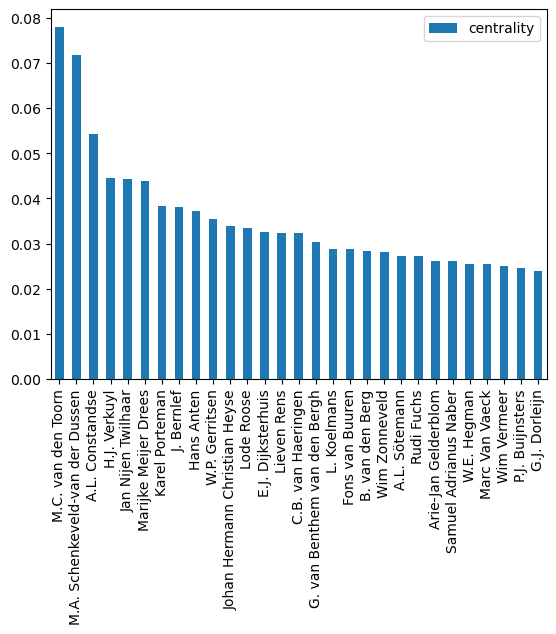

In [27]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
degree_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

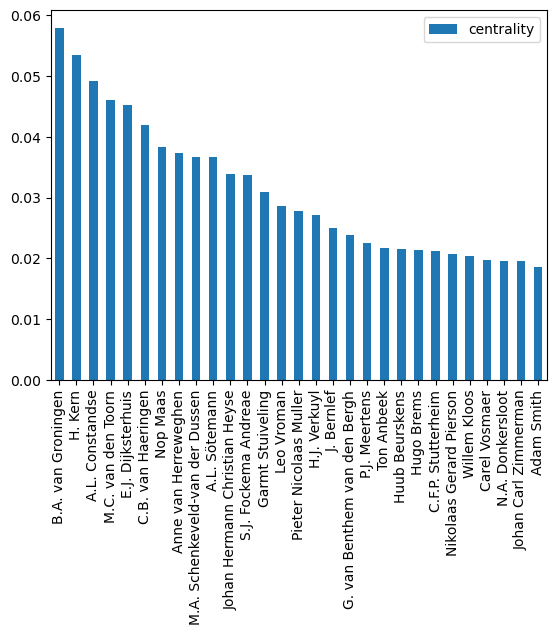

In [28]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

<Axes: >

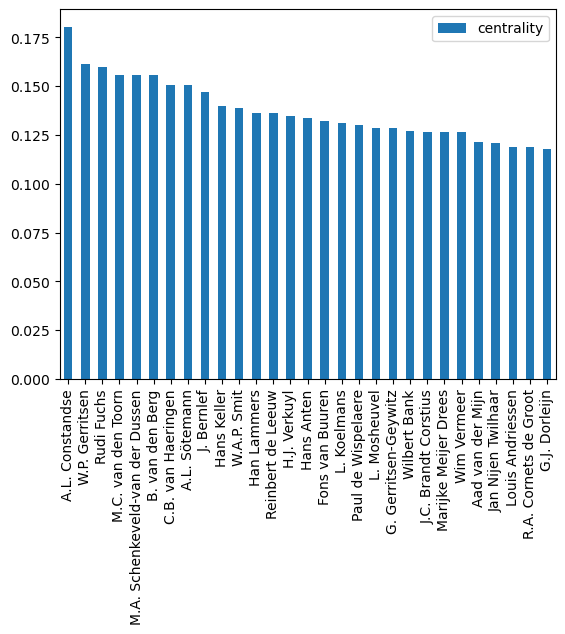

In [18]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 30 nodes
closeness_df.sort_values('centrality', ascending=False)[0:29].plot(kind="bar")

In [19]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Community detection

In [15]:
import community.community_louvain as community_louvain

communities = community_louvain.best_partition(G)
communities

{'Willem Maas': 0,
 'Jan Engelman': 0,
 'Jan Bruna': 0,
 'Henk Kuitenbrouwer': 0,
 'Albert Kuyle': 0,
 'Albert Helman': 0,
 'Anton van Duinkerken': 0,
 'Sybold van Ravesteyn': 0,
 'A. van Domburg': 0,
 'A.J.D. van Oosten': 0,
 'Ad. Sassen': 0,
 'Wouter Paap': 0,
 'A.G.W. Severijnen': 0,
 'Gerard Wijdeveld': 0,
 'Jan Vercammen': 0,
 'Carel Scharten': 1,
 'Margo Scharten-Antink': 1,
 'J.N. van Hall': 1,
 'Johan de Meester': 1,
 'R.P.J. Tutein Nolthenius': 1,
 'H.T. Colenbrander': 1,
 'D. van Blom': 1,
 'Johan Huizinga': 1,
 'M.H. van Campen': 1,
 'R.C. Bakhuizen van den Brink': 1,
 'H. Marsman': 1,
 'J.C. Bloem': 1,
 'Arthur J.H. Cornette': 1,
 'D.A.M. Binnendijk': 1,
 'Martinus Nijhoff': 1,
 'N.A. Donkersloot': 1,
 'Jan Greshoff': 2,
 'H.E.H. van Loon': 1,
 'E.J. Dijksterhuis': 1,
 'Theun de Vries': 1,
 'J.H. Plantenga': 1,
 'B.M. Telders': 1,
 'Anton van der Boom': 1,
 'J.N. Bakhuizen van den Brink': 1,
 'F. Bordewijk': 1,
 'A.N. Molenaar': 1,
 'C.F.A. van Dam': 4,
 'J.W.F. Werumeus Bu

In [16]:
# set communities as a node attribute
nx.set_node_attributes(G, communities, 'group')

# draw graph with communities
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("CCLAMP_communities.html")

CCLAMP_communities.html
